In [ ]:
#5 percent - 64-128-128-64
#4.5 percent - 64-64 - 3.15 - 0.944
#4.7 percent - 64-128-256-128-64- 0.979
#4.9 percent - 6-32-32-1 0.977
#5.8 percent - 6-32-64-64-32-1 

In [2]:
import sklearn
import keras
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.layers import Dense, Input
from keras.models import Model
from tensorflow.keras.layers import Dense,Activation,Dropout,Flatten,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import glob
import os
import math
from random import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from matplotlib import figure

In [5]:
data = pd.read_csv(r'C:\Users\harik\OneDrive\Documents\Python\Graphene\data.csv',delimiter=",")
data = data.dropna()
data = data.drop_duplicates()
data = data.sample(frac = 1, random_state = 10)
data.shape

(597, 5)

In [6]:
scaler_lat = MinMaxScaler()
scaler_temp = MinMaxScaler()
scaler_crack = MinMaxScaler()
scaler_fs = MinMaxScaler()
scaler_co = MinMaxScaler()
data.CO = scaler_co.fit_transform(data[['CO']])
data.CS = scaler_crack.fit_transform(data[['CS']])
data.FS = scaler_fs.fit_transform(data[['FS']])
data.T = scaler_temp.fit_transform(data[['T']])
data.LO = scaler_lat.fit_transform(data[['LO']])

In [8]:
data.to_csv('new_data.csv')
train, test = train_test_split(data, test_size=0.2, random_state = 1)
#train_or, test_or = train_test_split(data1, test_size=0.2, random_state = 1)

In [9]:
data_x = data[['T', 'CS', 'CO', 'LO']]
data_y = data['FS']
test_x = test[['T', 'CS', 'CO', 'LO']]
test_y = test['FS']
train_x = train[['T', 'CS', 'CO', 'LO']]
train_y = train['FS']

model = Sequential([
    Dense(units=8,activation='relu'),
    Dense(units=32,activation='relu'),
    Dense(units=64,activation='relu'),
    Dense(units=128,activation='relu'),
    Dense(units=128,activation='relu'),
    Dense(units=128,activation='relu'),
    Dense(units=64,activation='relu'),
    Dense(units=32,activation='relu'),
    Dense(units=1, activation = 'relu'),
    ])

In [12]:
model = Sequential([
    Input(shape = 4),
    Dense(units=56,activation='relu'),
    #Dense(units=16,activation='relu'),
    #Dense(units=8,activation='relu'),
    #Dense(units=2,activation='relu'),
    Dense(units=1,activation='linear')
    ])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 56)                280       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 57        
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


Epoch 1/200
108/108 [==============================] - 1s 4ms/step - loss: 5.7830e-04 - mse: 5.7830e-04 - val_loss: 8.3893e-04 - val_mse: 8.3893e-04
Epoch 2/200
108/108 [==============================] - 0s 3ms/step - loss: 4.9468e-04 - mse: 4.9468e-04 - val_loss: 9.9925e-04 - val_mse: 9.9925e-04
Epoch 3/200
108/108 [==============================] - 0s 3ms/step - loss: 5.3651e-04 - mse: 5.3651e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 4/200
108/108 [==============================] - 0s 3ms/step - loss: 5.7613e-04 - mse: 5.7613e-04 - val_loss: 9.7726e-04 - val_mse: 9.7726e-04
Epoch 5/200
108/108 [==============================] - 0s 3ms/step - loss: 4.9456e-04 - mse: 4.9456e-04 - val_loss: 8.8717e-04 - val_mse: 8.8717e-04
Epoch 6/200
108/108 [==============================] - 0s 3ms/step - loss: 4.5469e-04 - mse: 4.5469e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 7/200
108/108 [==============================] - 0s 3ms/step - loss: 4.9997e-04 - mse: 4.9997e-04 - val_loss: 8.2600

108/108 [==============================] - 0s 2ms/step - loss: 4.2431e-04 - mse: 4.2431e-04 - val_loss: 8.4985e-04 - val_mse: 8.4985e-04
Epoch 112/200
108/108 [==============================] - 0s 3ms/step - loss: 4.5884e-04 - mse: 4.5884e-04 - val_loss: 9.4396e-04 - val_mse: 9.4396e-04
Epoch 113/200
108/108 [==============================] - 0s 3ms/step - loss: 4.0438e-04 - mse: 4.0438e-04 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 114/200
108/108 [==============================] - 0s 3ms/step - loss: 4.4255e-04 - mse: 4.4255e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 115/200
108/108 [==============================] - 0s 3ms/step - loss: 4.0913e-04 - mse: 4.0913e-04 - val_loss: 8.0070e-04 - val_mse: 8.0070e-04
Epoch 116/200
108/108 [==============================] - 0s 2ms/step - loss: 4.0969e-04 - mse: 4.0969e-04 - val_loss: 8.7564e-04 - val_mse: 8.7564e-04
Epoch 117/200
108/108 [==============================] - 0s 2ms/step - loss: 3.9581e-04 - mse: 3.9581e-04 - val_loss: 8.6062

Epoch 166/200
108/108 [==============================] - 0s 2ms/step - loss: 3.6846e-04 - mse: 3.6846e-04 - val_loss: 6.3596e-04 - val_mse: 6.3596e-04
Epoch 167/200
108/108 [==============================] - 0s 2ms/step - loss: 6.1338e-04 - mse: 6.1338e-04 - val_loss: 7.9402e-04 - val_mse: 7.9402e-04
Epoch 168/200
108/108 [==============================] - 0s 2ms/step - loss: 4.0700e-04 - mse: 4.0700e-04 - val_loss: 7.6686e-04 - val_mse: 7.6686e-04
Epoch 169/200
108/108 [==============================] - 0s 3ms/step - loss: 3.8704e-04 - mse: 3.8704e-04 - val_loss: 7.3261e-04 - val_mse: 7.3261e-04
Epoch 170/200
108/108 [==============================] - 0s 3ms/step - loss: 4.2535e-04 - mse: 4.2535e-04 - val_loss: 8.7511e-04 - val_mse: 8.7511e-04
Epoch 171/200
108/108 [==============================] - 0s 3ms/step - loss: 4.2283e-04 - mse: 4.2283e-04 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 172/200
108/108 [==============================] - 0s 2ms/step - loss: 4.0459e-04 - mse: 4.0459e

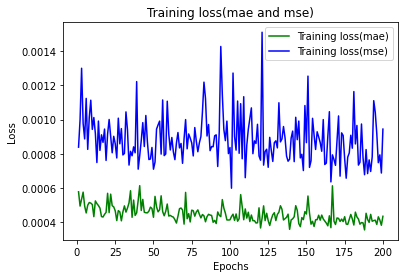

In [15]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics = ['mse'])
history_1 = model.fit(train_x,train_y,epochs=200,batch_size= 4, verbose = 1, shuffle = True, validation_split = 0.1)
loss_train = history_1.history['loss']
loss_val = history_1.history['val_loss']
epochs = range(1,201)
print(len(epochs))
plt.plot(epochs, loss_train, 'g', label='Training loss(mae)')
plt.plot(epochs, loss_val, 'b', label='Training loss(mse)')
plt.title('Training loss(mae and mse)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/400
108/108 [==============================] - 1s 4ms/step - loss: 3.1805e-04 - mse: 3.1805e-04 - val_loss: 7.6801e-04 - val_mse: 7.6801e-04
Epoch 2/400
108/108 [==============================] - 0s 3ms/step - loss: 2.9101e-04 - mse: 2.9101e-04 - val_loss: 7.4186e-04 - val_mse: 7.4186e-04
Epoch 3/400
108/108 [==============================] - 0s 3ms/step - loss: 2.8939e-04 - mse: 2.8939e-04 - val_loss: 7.3788e-04 - val_mse: 7.3788e-04
Epoch 4/400
108/108 [==============================] - 0s 3ms/step - loss: 2.9034e-04 - mse: 2.9034e-04 - val_loss: 7.3860e-04 - val_mse: 7.3860e-04
Epoch 5/400
108/108 [==============================] - 0s 3ms/step - loss: 2.8042e-04 - mse: 2.8042e-04 - val_loss: 7.6582e-04 - val_mse: 7.6582e-04
Epoch 6/400
108/108 [==============================] - 0s 3ms/step - loss: 2.8747e-04 - mse: 2.8747e-04 - val_loss: 7.2972e-04 - val_mse: 7.2972e-04
Epoch 7/400
108/108 [==============================] - 0s 3ms/step - loss: 2.8532e-04 - mse: 2.8532e-04 - 

Epoch 56/400
108/108 [==============================] - 0s 3ms/step - loss: 2.8117e-04 - mse: 2.8117e-04 - val_loss: 7.1300e-04 - val_mse: 7.1300e-04
Epoch 57/400
108/108 [==============================] - 0s 3ms/step - loss: 2.7979e-04 - mse: 2.7979e-04 - val_loss: 7.0837e-04 - val_mse: 7.0837e-04
Epoch 58/400
108/108 [==============================] - 0s 3ms/step - loss: 2.7696e-04 - mse: 2.7696e-04 - val_loss: 6.9934e-04 - val_mse: 6.9934e-04
Epoch 59/400
108/108 [==============================] - 0s 3ms/step - loss: 2.7819e-04 - mse: 2.7819e-04 - val_loss: 7.3553e-04 - val_mse: 7.3553e-04
Epoch 60/400
108/108 [==============================] - 0s 3ms/step - loss: 2.7840e-04 - mse: 2.7840e-04 - val_loss: 7.0189e-04 - val_mse: 7.0189e-04
Epoch 61/400
108/108 [==============================] - 0s 3ms/step - loss: 2.8423e-04 - mse: 2.8423e-04 - val_loss: 7.0477e-04 - val_mse: 7.0477e-04
Epoch 62/400
108/108 [==============================] - 0s 3ms/step - loss: 2.7585e-04 - mse: 2.7585

108/108 [==============================] - 0s 3ms/step - loss: 2.8454e-04 - mse: 2.8454e-04 - val_loss: 7.2015e-04 - val_mse: 7.2015e-04
Epoch 165/400
108/108 [==============================] - 0s 3ms/step - loss: 2.7310e-04 - mse: 2.7310e-04 - val_loss: 7.1564e-04 - val_mse: 7.1564e-04
Epoch 166/400
108/108 [==============================] - 0s 3ms/step - loss: 2.7451e-04 - mse: 2.7451e-04 - val_loss: 7.1491e-04 - val_mse: 7.1491e-04
Epoch 167/400
108/108 [==============================] - 0s 3ms/step - loss: 2.7178e-04 - mse: 2.7178e-04 - val_loss: 7.1907e-04 - val_mse: 7.1907e-04
Epoch 168/400
108/108 [==============================] - 0s 3ms/step - loss: 2.7689e-04 - mse: 2.7689e-04 - val_loss: 7.3686e-04 - val_mse: 7.3686e-04
Epoch 169/400
108/108 [==============================] - 0s 3ms/step - loss: 2.7414e-04 - mse: 2.7414e-04 - val_loss: 7.1672e-04 - val_mse: 7.1672e-04
Epoch 170/400
108/108 [==============================] - 0s 3ms/step - loss: 2.6903e-04 - mse: 2.6903e-04 - 

108/108 [==============================] - 0s 3ms/step - loss: 2.7083e-04 - mse: 2.7083e-04 - val_loss: 7.3472e-04 - val_mse: 7.3472e-04
Epoch 273/400
108/108 [==============================] - 0s 3ms/step - loss: 2.7138e-04 - mse: 2.7138e-04 - val_loss: 7.2822e-04 - val_mse: 7.2822e-04
Epoch 274/400
108/108 [==============================] - 0s 3ms/step - loss: 2.7074e-04 - mse: 2.7074e-04 - val_loss: 7.1557e-04 - val_mse: 7.1557e-04
Epoch 275/400
108/108 [==============================] - 0s 3ms/step - loss: 2.7188e-04 - mse: 2.7188e-04 - val_loss: 7.1138e-04 - val_mse: 7.1138e-04
Epoch 276/400
108/108 [==============================] - 0s 2ms/step - loss: 2.7643e-04 - mse: 2.7643e-04 - val_loss: 7.3372e-04 - val_mse: 7.3372e-04
Epoch 277/400
108/108 [==============================] - 0s 2ms/step - loss: 2.6760e-04 - mse: 2.6760e-04 - val_loss: 7.2708e-04 - val_mse: 7.2708e-04
Epoch 278/400
108/108 [==============================] - 0s 3ms/step - loss: 2.7031e-04 - mse: 2.7031e-04 - 

108/108 [==============================] - 0s 3ms/step - loss: 2.6468e-04 - mse: 2.6468e-04 - val_loss: 7.1915e-04 - val_mse: 7.1915e-04
Epoch 381/400
108/108 [==============================] - 0s 3ms/step - loss: 2.6541e-04 - mse: 2.6541e-04 - val_loss: 7.2165e-04 - val_mse: 7.2165e-04
Epoch 382/400
108/108 [==============================] - 0s 2ms/step - loss: 2.6784e-04 - mse: 2.6784e-04 - val_loss: 7.1923e-04 - val_mse: 7.1923e-04
Epoch 383/400
108/108 [==============================] - 0s 3ms/step - loss: 2.6303e-04 - mse: 2.6303e-04 - val_loss: 7.1626e-04 - val_mse: 7.1626e-04
Epoch 384/400
108/108 [==============================] - 0s 2ms/step - loss: 2.6577e-04 - mse: 2.6577e-04 - val_loss: 7.2616e-04 - val_mse: 7.2616e-04
Epoch 385/400
108/108 [==============================] - 0s 3ms/step - loss: 2.6593e-04 - mse: 2.6593e-04 - val_loss: 7.2071e-04 - val_mse: 7.2071e-04
Epoch 386/400
108/108 [==============================] - 0s 2ms/step - loss: 2.6719e-04 - mse: 2.6719e-04 - 

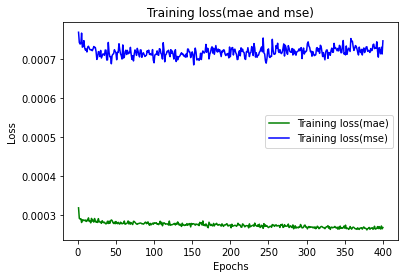

In [16]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error', metrics = ['mse'])
history_2 = model.fit(train_x,train_y,epochs=400,batch_size= 4, verbose = 1, shuffle = True, validation_split = 0.1)
#y_pred = model.predict(test_x)
loss_train = history_2.history['loss']
loss_val = history_2.history['val_loss']
epochs = range(1,401)
print(len(epochs))
plt.plot(epochs, loss_train, 'g', label='Training loss(mae)')
plt.plot(epochs, loss_val, 'b', label='Training loss(mse)')
plt.title('Training loss(mae and mse)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/400
108/108 [==============================] - 1s 3ms/step - loss: 2.5821e-04 - mse: 2.5821e-04 - val_loss: 7.4182e-04 - val_mse: 7.4182e-04
Epoch 2/400
108/108 [==============================] - 0s 3ms/step - loss: 2.5532e-04 - mse: 2.5532e-04 - val_loss: 7.3914e-04 - val_mse: 7.3914e-04
Epoch 3/400
108/108 [==============================] - 0s 3ms/step - loss: 2.5437e-04 - mse: 2.5437e-04 - val_loss: 7.3769e-04 - val_mse: 7.3769e-04
Epoch 4/400
108/108 [==============================] - 0s 3ms/step - loss: 2.5375e-04 - mse: 2.5375e-04 - val_loss: 7.3716e-04 - val_mse: 7.3716e-04
Epoch 5/400
108/108 [==============================] - 0s 3ms/step - loss: 2.5325e-04 - mse: 2.5325e-04 - val_loss: 7.3630e-04 - val_mse: 7.3630e-04
Epoch 6/400
108/108 [==============================] - 0s 3ms/step - loss: 2.5323e-04 - mse: 2.5323e-04 - val_loss: 7.3454e-04 - val_mse: 7.3454e-04
Epoch 7/400
108/108 [==============================] - 0s 3ms/step - loss: 2.5293e-04 - mse: 2.5293e-04 - 

Epoch 56/400
108/108 [==============================] - 0s 3ms/step - loss: 2.5256e-04 - mse: 2.5256e-04 - val_loss: 7.1917e-04 - val_mse: 7.1917e-04
Epoch 57/400
108/108 [==============================] - 0s 3ms/step - loss: 2.5252e-04 - mse: 2.5252e-04 - val_loss: 7.1643e-04 - val_mse: 7.1643e-04
Epoch 58/400
108/108 [==============================] - 0s 3ms/step - loss: 2.5250e-04 - mse: 2.5250e-04 - val_loss: 7.1705e-04 - val_mse: 7.1705e-04
Epoch 59/400
108/108 [==============================] - 0s 3ms/step - loss: 2.5222e-04 - mse: 2.5222e-04 - val_loss: 7.1793e-04 - val_mse: 7.1793e-04
Epoch 60/400
108/108 [==============================] - 0s 3ms/step - loss: 2.5255e-04 - mse: 2.5255e-04 - val_loss: 7.1807e-04 - val_mse: 7.1807e-04
Epoch 61/400
108/108 [==============================] - 0s 2ms/step - loss: 2.5269e-04 - mse: 2.5269e-04 - val_loss: 7.1895e-04 - val_mse: 7.1895e-04
Epoch 62/400
108/108 [==============================] - 0s 3ms/step - loss: 2.5321e-04 - mse: 2.5321

108/108 [==============================] - 0s 3ms/step - loss: 2.5224e-04 - mse: 2.5224e-04 - val_loss: 7.1964e-04 - val_mse: 7.1964e-04
Epoch 165/400
108/108 [==============================] - 0s 3ms/step - loss: 2.5206e-04 - mse: 2.5206e-04 - val_loss: 7.1932e-04 - val_mse: 7.1932e-04
Epoch 166/400
108/108 [==============================] - 0s 3ms/step - loss: 2.5200e-04 - mse: 2.5200e-04 - val_loss: 7.1839e-04 - val_mse: 7.1839e-04
Epoch 167/400
108/108 [==============================] - 0s 3ms/step - loss: 2.5257e-04 - mse: 2.5257e-04 - val_loss: 7.1714e-04 - val_mse: 7.1714e-04
Epoch 168/400
108/108 [==============================] - 0s 3ms/step - loss: 2.5205e-04 - mse: 2.5205e-04 - val_loss: 7.1763e-04 - val_mse: 7.1763e-04
Epoch 169/400
108/108 [==============================] - 0s 3ms/step - loss: 2.5248e-04 - mse: 2.5248e-04 - val_loss: 7.1842e-04 - val_mse: 7.1842e-04
Epoch 170/400
108/108 [==============================] - 0s 3ms/step - loss: 2.5170e-04 - mse: 2.5170e-04 - 

108/108 [==============================] - 0s 2ms/step - loss: 2.5168e-04 - mse: 2.5168e-04 - val_loss: 7.1792e-04 - val_mse: 7.1792e-04
Epoch 273/400
108/108 [==============================] - 0s 3ms/step - loss: 2.5141e-04 - mse: 2.5141e-04 - val_loss: 7.1777e-04 - val_mse: 7.1777e-04
Epoch 274/400
108/108 [==============================] - 0s 3ms/step - loss: 2.5200e-04 - mse: 2.5200e-04 - val_loss: 7.1807e-04 - val_mse: 7.1807e-04
Epoch 275/400
108/108 [==============================] - 0s 3ms/step - loss: 2.5168e-04 - mse: 2.5168e-04 - val_loss: 7.1977e-04 - val_mse: 7.1977e-04
Epoch 276/400
108/108 [==============================] - 0s 3ms/step - loss: 2.5213e-04 - mse: 2.5213e-04 - val_loss: 7.1842e-04 - val_mse: 7.1842e-04
Epoch 277/400
108/108 [==============================] - 0s 3ms/step - loss: 2.5171e-04 - mse: 2.5171e-04 - val_loss: 7.1772e-04 - val_mse: 7.1772e-04
Epoch 278/400
108/108 [==============================] - 0s 3ms/step - loss: 2.5184e-04 - mse: 2.5184e-04 - 

108/108 [==============================] - 0s 3ms/step - loss: 2.5139e-04 - mse: 2.5139e-04 - val_loss: 7.1858e-04 - val_mse: 7.1858e-04
Epoch 381/400
108/108 [==============================] - 0s 3ms/step - loss: 2.5135e-04 - mse: 2.5135e-04 - val_loss: 7.1910e-04 - val_mse: 7.1910e-04
Epoch 382/400
108/108 [==============================] - 0s 3ms/step - loss: 2.5184e-04 - mse: 2.5184e-04 - val_loss: 7.1846e-04 - val_mse: 7.1846e-04
Epoch 383/400
108/108 [==============================] - 0s 3ms/step - loss: 2.5118e-04 - mse: 2.5118e-04 - val_loss: 7.1874e-04 - val_mse: 7.1874e-04
Epoch 384/400
108/108 [==============================] - 0s 3ms/step - loss: 2.5217e-04 - mse: 2.5217e-04 - val_loss: 7.1846e-04 - val_mse: 7.1846e-04
Epoch 385/400
108/108 [==============================] - 0s 3ms/step - loss: 2.5177e-04 - mse: 2.5177e-04 - val_loss: 7.2025e-04 - val_mse: 7.2025e-04
Epoch 386/400
108/108 [==============================] - 0s 3ms/step - loss: 2.5172e-04 - mse: 2.5172e-04 - 

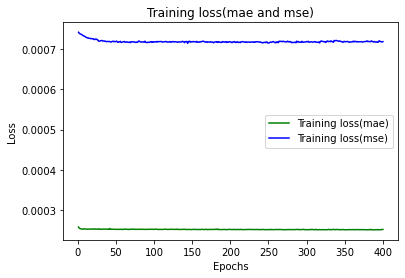

In [17]:
model.compile(optimizer=Adam(learning_rate=0.00001), loss='mean_squared_error', metrics = ['mse'])
history_3 = model.fit(train_x,train_y,epochs=400,batch_size= 4, verbose = 1, shuffle = True, validation_split = 0.1)

loss_train = history_3.history['loss']
loss_val = history_3.history['val_loss']
epochs = range(1,401)
print(len(epochs))
plt.plot(epochs, loss_train, 'g', label='Training loss(mae)')
plt.plot(epochs, loss_val, 'b', label='Training loss(mse)')
plt.title('Training loss(mae and mse)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
y_pred = model.predict(test_x).reshape(-1,1)
a = model.evaluate(test_x, test_y, batch_size = 2)
test_y_np = np.array(test_y)
test_y_np = test_y_np.reshape(-1,1)
y_pred_in = scaler_fs.inverse_transform(y_pred)
y_test_in = scaler_fs.inverse_transform(test_y_np)
print(mean_squared_error(y_pred, test_y), r2_score(y_pred, test_y))
print(mean_squared_error(y_pred_in, y_test_in), r2_score(y_pred_in, y_test_in))
print(mean_absolute_percentage_error(y_test_in, y_pred_in)*100)

60/60 [==============================] - 0s 3ms/step - loss: 7.3281e-04 - mse: 7.3281e-04
0.0007328078664137816 0.986315572658561
67.74544320977995 0.9863155752644706
5.110739832454849


In [59]:
k = data.loc[(data['LO'] >= 0.30)&( data['LO'] < 0.6)]
train_k, test_k = train_test_split(k, test_size=0.2, random_state = 1)
test_x_k = test_k[['T', 'CS', 'CO', 'LO']]
test_y_k = test_k['FS']
train_x_k = train_k[['T', 'CS', 'CO', 'LO']]
train_y_k = train_k['FS']

In [60]:
y_pred = model.predict(test_x_k).reshape(-1,1)
a = model.evaluate(test_x_k, test_y_k, batch_size = 2)
test_y_np = np.array(test_y_k)
test_y_np = test_y_np.reshape(-1,1)
y_pred_in = scaler_fs.inverse_transform(y_pred)
y_test_in = scaler_fs.inverse_transform(test_y_np)
print(mean_squared_error(y_pred, test_y_k), r2_score(y_pred, test_y_k))
print(mean_squared_error(y_pred_in, y_test_in), r2_score(y_pred_in, y_test_in))
print(mean_absolute_percentage_error(y_test_in, y_pred_in)*100)

19/19 [==============================] - 0s 5ms/step - loss: 5.1688e-04 - mse: 5.1688e-04
0.0005168830557668012 0.985237988159841
47.78398735522026 0.9852379866922464
4.976577300300252


In [26]:
y_pred_t = model.predict(train_x).reshape(-1,1)
print(mean_squared_error(y_pred_t, train_y), r2_score(y_pred_t, train_y))
model.evaluate(train_x, train_y, batch_size = 2)
test_y_np = np.array(train_y)
test_y_np = test_y_np.reshape(-1,1)
y_pred_in_t = scaler_fs.inverse_transform(y_pred_t)
y_test_in_t = scaler_fs.inverse_transform(test_y_np)
print(mean_squared_error(y_pred_in_t, y_test_in_t), r2_score(y_pred_in_t, y_test_in_t))
print(mean_absolute_percentage_error(y_test_in_t, y_pred_in_t)*100)

0.0002971070003874263 0.9933097874814919
239/239 [==============================] - 1s 3ms/step - loss: 2.9711e-04 - mse: 2.9711e-04
27.466475469188964 0.9933097873421771
3.8646476316740466


In [27]:
t = []
k = y_test_in.shape
for i in range(0, k[0]):
    p = (float)(y_pred_in[i])
    m = (float)(y_test_in[i])
    k = [p, m, abs(p-m)] 
    t.append(k)
t = np.array(t)

#print(t)
df = pd.DataFrame(t, columns = ['Prediced', 'True', 'Error'])
df = df.sort_values('Error', ascending = 0)
df.head(60)
t = []
k = y_test_in_t.shape
for i in range(0, k[0]):
    p = (float)(y_pred_in_t[i])
    m = (float)(y_test_in_t[i])
    k = [p, m, abs(p-m)] 
    t.append(k)
t = np.array(t)
#print(t)
df_train = pd.DataFrame(t, columns = ['Prediced', 'True', 'Error'])

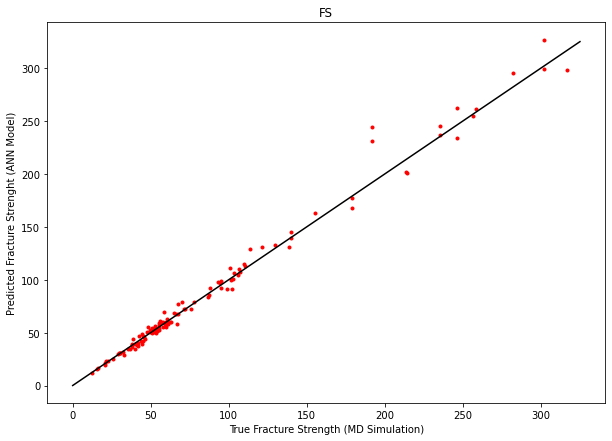

In [31]:
import matplotlib.pyplot as plt
from matplotlib import figure
fig = plt.figure(figsize=(10, 7))
plt.scatter(y_test_in, y_pred_in, marker = '.', c = "red")
plt.xlabel('True Fracture Strength (MD Simulation)')
plt.ylabel('Predicted Fracture Strenght (ANN Model)')
plt.title('FS')
plt.plot([0,325], [0, 325], color = 'black')

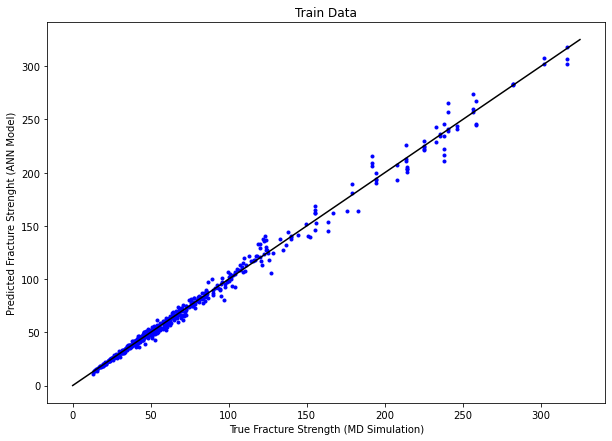

In [32]:
import matplotlib.pyplot as plt
from matplotlib import figure
fig = plt.figure(figsize=(10, 7))
plt.scatter(y_test_in_t, y_pred_in_t, marker = '.', c = "blue")
plt.xlabel('True Fracture Strength (MD Simulation)')
plt.ylabel('Predicted Fracture Strenght (ANN Model)')
plt.title('Train Data')

plt.plot([0,325], [0, 325], color = 'black')
plt.show()

In [182]:
import os
path = r'C:\Users\harik\OneDrive\Documents\Python\Graphene\ANN\new'
#os.mkdir(path)
os.chdir(path)
os.getcwd()

'C:\\Users\\harik\\OneDrive\\Documents\\Python\\Graphene\\ANN\\new'

In [183]:
t = []
k = y_test_in.shape
for i in range(0, k[0]):
    p = (float)(y_pred_in[i])
    m = (float)(y_test_in[i])
    k = [p, m, abs(p-m)] 
    t.append(k)
t = np.array(t)
#print(t)
df = pd.DataFrame(t, columns = ['Prediced', 'True', 'Error'])
df = df.sort_values('Error', ascending = 0)
df.to_csv('Pred_True_train.csv')

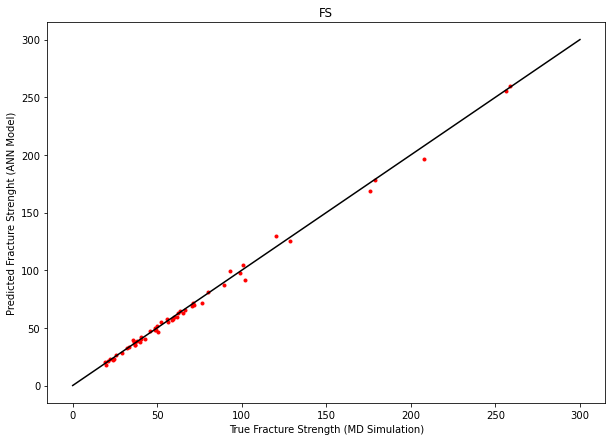

In [184]:
fig = plt.figure(figsize=(10, 7))
plt.scatter(y_test_in, y_pred_in, marker = '.', c = "red")
plt.xlabel('True Fracture Strength (MD Simulation)')
plt.ylabel('Predicted Fracture Strenght (ANN Model)')
plt.title('FS')
plt.plot([0,300], [0, 300], color = 'black')
plt.savefig('TrueVsPred.png', dpi = 100)
plt.show()

In [185]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [186]:
# convert the history.history dict to a pandas DataFrame:     
hist_df_1 = pd.DataFrame(history_1.history) 
hist_df_2 = pd.DataFrame(history_2.history)
hist_df_3 = pd.DataFrame(history_3.history)
hist_df = hist_df_1.append(hist_df_2, ignore_index = True)
hist_df = hist_df.append(hist_df_3, ignore_index = True)
# or save to csv: 
hist_df.to_csv('history.csv')

file1 = open("info.txt","a")
file1.write("Learning rate = 0.00005 for 200 train test split = 0.20 loss = mae \n")
file1.write("Learning rate = 0.00001 for 100 train test split = 0.20 loss = mae \n")
file1.write("Learning rate = 0.000005 for 100 train test split = 0.20 loss = mae \n")
print(mean_absolute_error(y_pred, test_y), r2_score(y_pred, test_y),'\n', file = file1)
print(mean_absolute_error(y_pred_in, y_test_in), r2_score(y_pred_in, y_test_in), '\n', file = file1)
print(mean_absolute_percentage_error(y_test_in, y_pred_in)*100, '\n', file = file1)
file1.close()

In [38]:
from keras.models import model_from_json
json_file = open('model_2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_2.h5")
print("Loaded model from disk")

Loaded model from disk


In [39]:
y_pred = loaded_model.predict(test_x)
print(mean_absolute_error(y_pred, test_y), r2_score(y_pred, test_y))
test_y_np = np.array(test_y)
test_y_np = test_y_np.reshape(-1,1)
y_pred_in = scaler_fs.inverse_transform(y_pred)
y_test_in = scaler_fs.inverse_transform(test_y_np)
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_test_in, y_pred_in))
print(mean_absolute_error(y_pred_in, y_test_in), r2_score(y_pred_in, y_test_in))

0.009516710203451817 0.9905244277011236
0.028568718188526746
2.3348291135347807 0.9905244311459185


In [40]:
loaded_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 8)                 32        
_________________________________________________________________
dense_37 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_38 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_39 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_40 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_41 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_42 (Dense)             (None, 64)               

In [141]:
test_x_in = test_x.copy()
test_x_in.LO = scaler_lat.inverse_transform(test_x_in[['LO']])
test_x_in.CS = scaler_crack.inverse_transform(test_x_in[['CS']])
test_x_in.T = scaler_temp.inverse_transform(test_x_in[['T']]) 

In [142]:
test_x_in

,LO,T,CS
26,0.0,300.0,0.8
86,13.9,600.0,0.5
54,13.9,0.0,0.0
12,0.0,100.0,0.3
65,13.9,100.0,0.2
50,0.0,1200.0,0.5
49,0.0,1200.0,0.4
40,0.0,900.0,0.4
68,13.9,100.0,0.5
20,0.0,300.0,0.2


In [64]:
test_x = test_data[['LO', 'T', 'CS']]
test_y = test_data['FS']
train_x = data[['LO', 'T', 'CS']]
train_y = data['FS']

In [94]:
!pip install scikeras==0.4.1

  Attempting uninstall: scikeras
    Found existing installation: scikeras 0.6.1
    Uninstalling scikeras-0.6.1:
      Successfully uninstalled scikeras-0.6.1


In [212]:
import scikeras
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(32, input_dim=3, kernel_initializer='normal', activation='relu'))
    #model.add(Dense(32, kernel_initializer='normal', activation='relu'))
    model.add(Dense(16,  kernel_initializer='normal', activation='relu'))
    model.add(Dense(8,  kernel_initializer='normal', activation='relu'))
    #model.add(Dense(4,  kernel_initializer='normal', activation='relu'))
    #model.add(Dense(2, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='linear'))
    # Compile model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics = ['mse'])
    return model


estimator = KerasRegressor(model=baseline_model, epochs=300, batch_size=4, verbose=1)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator,X= data_x, y = data_y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Epoch 1/300
62/62 [==============================] - 1s 5ms/step - loss: 0.1222 - mse: 0.1222
Epoch 2/300
62/62 [==============================] - 0s 4ms/step - loss: 0.0740 - mse: 0.0740A: 0s - loss: 0.1034 - mse: 0.1
Epoch 3/300
62/62 [==============================] - 0s 4ms/step - loss: 0.0593 - mse: 0.0593
Epoch 4/300
62/62 [==============================] - 0s 4ms/step - loss: 0.0493 - mse: 0.0493
Epoch 5/300
62/62 [==============================] - 0s 4ms/step - loss: 0.0400 - mse: 0.0400
Epoch 6/300
62/62 [==============================] - 0s 4ms/step - loss: 0.0325 - mse: 0.0325
Epoch 7/300
62/62 [==============================] - 0s 5ms/step - loss: 0.0270 - mse: 0.0270A: 0s - loss: 0.0251 - mse: 0.02 - ETA: 0s - loss: 0.0264 - mse: 0.026
Epoch 8/300
62/62 [==============================] - 0s 5ms/step - loss: 0.0243 - mse: 0.0243
Epoch 9/300
62/62 [==============================] - 0s 5ms/step - loss: 0.0216 - mse: 0.0216
Epoch 10/300
62/62 [==============================] -

62/62 [==============================] - 0s 4ms/step - loss: 9.7790e-04 - mse: 9.7790e-04
Epoch 164/300
62/62 [==============================] - 0s 4ms/step - loss: 9.0792e-04 - mse: 9.0792e-04
Epoch 165/300
62/62 [==============================] - 0s 4ms/step - loss: 9.8665e-04 - mse: 9.8665e-04
Epoch 166/300
62/62 [==============================] - 0s 4ms/step - loss: 7.6526e-04 - mse: 7.6526e-04
Epoch 167/300
62/62 [==============================] - 0s 4ms/step - loss: 6.8035e-04 - mse: 6.8035e-04
Epoch 168/300
62/62 [==============================] - 0s 4ms/step - loss: 8.6683e-04 - mse: 8.6683e-04
Epoch 169/300
62/62 [==============================] - 0s 4ms/step - loss: 9.1505e-04 - mse: 9.1505e-04
Epoch 170/300
62/62 [==============================] - 0s 5ms/step - loss: 6.9276e-04 - mse: 6.9276e-04
Epoch 171/300
62/62 [==============================] - 0s 4ms/step - loss: 6.7568e-04 - mse: 6.7568e-04
Epoch 172/300
62/62 [==============================] - 0s 4ms/step - loss: 7.3

62/62 [==============================] - 0s 6ms/step - loss: 0.0051 - mse: 0.0051
Epoch 21/300
62/62 [==============================] - 0s 4ms/step - loss: 0.0044 - mse: 0.0044
Epoch 22/300
62/62 [==============================] - 0s 5ms/step - loss: 0.0039 - mse: 0.0039
Epoch 23/300
62/62 [==============================] - 0s 5ms/step - loss: 0.0037 - mse: 0.0037
Epoch 24/300
62/62 [==============================] - 0s 4ms/step - loss: 0.0037 - mse: 0.0037
Epoch 25/300
62/62 [==============================] - 0s 4ms/step - loss: 0.0033 - mse: 0.0033
Epoch 26/300
62/62 [==============================] - 0s 5ms/step - loss: 0.0030 - mse: 0.0030
Epoch 27/300
62/62 [==============================] - 0s 5ms/step - loss: 0.0027 - mse: 0.0027
Epoch 28/300
62/62 [==============================] - 0s 4ms/step - loss: 0.0026 - mse: 0.0026   - ETA: 0s - loss: 0.0033 - mse: 0.00
Epoch 29/300
62/62 [==============================] - 0s 4ms/step - loss: 0.0028 - mse: 0.0028
Epoch 30/300
62/62 [====

62/62 [==============================] - 0s 5ms/step - loss: 6.7076e-04 - mse: 6.7076e-04
Epoch 179/300
62/62 [==============================] - 0s 5ms/step - loss: 0.0014 - mse: 0.0014
Epoch 180/300
62/62 [==============================] - 0s 5ms/step - loss: 5.8280e-04 - mse: 5.8280e-04
Epoch 181/300
62/62 [==============================] - 0s 5ms/step - loss: 6.0707e-04 - mse: 6.0707e-04
Epoch 182/300
62/62 [==============================] - 0s 5ms/step - loss: 5.8370e-04 - mse: 5.8370e-04
Epoch 183/300
62/62 [==============================] - 0s 4ms/step - loss: 4.4449e-04 - mse: 4.4449e-04
Epoch 184/300
62/62 [==============================] - 0s 4ms/step - loss: 4.9427e-04 - mse: 4.9427e-04
Epoch 185/300
62/62 [==============================] - 0s 4ms/step - loss: 0.0017 - mse: 0.0017   
Epoch 186/300
62/62 [==============================] - 0s 4ms/step - loss: 7.0272e-04 - mse: 7.0272e-04
Epoch 187/300
62/62 [==============================] - 0s 4ms/step - loss: 5.0783e-04 - mse

62/62 [==============================] - 0s 5ms/step - loss: 0.0012 - mse: 0.0012
Epoch 35/300
62/62 [==============================] - 0s 5ms/step - loss: 0.0011 - mse: 0.0011
Epoch 36/300
62/62 [==============================] - 0s 5ms/step - loss: 0.0011 - mse: 0.0011
Epoch 37/300
62/62 [==============================] - 0s 7ms/step - loss: 0.0011 - mse: 0.0011
Epoch 38/300
62/62 [==============================] - 0s 6ms/step - loss: 8.9672e-04 - mse: 8.9672e-04
Epoch 39/300
62/62 [==============================] - 0s 5ms/step - loss: 9.9934e-04 - mse: 9.9934e-04
Epoch 40/300
62/62 [==============================] - 0s 4ms/step - loss: 8.8178e-04 - mse: 8.8178e-04
Epoch 41/300
62/62 [==============================] - 0s 5ms/step - loss: 9.2149e-04 - mse: 9.2149e-04
Epoch 42/300
62/62 [==============================] - 0s 5ms/step - loss: 9.6420e-04 - mse: 9.6420e-04
Epoch 43/300
62/62 [==============================] - 0s 6ms/step - loss: 0.0012 - mse: 0.0012
Epoch 44/300
62/62 [===

62/62 [==============================] - 0s 4ms/step - loss: 2.6386e-04 - mse: 2.6386e-04
Epoch 192/300
62/62 [==============================] - 0s 4ms/step - loss: 2.9843e-04 - mse: 2.9843e-04
Epoch 193/300
62/62 [==============================] - 0s 4ms/step - loss: 2.9268e-04 - mse: 2.9268e-04
Epoch 194/300
62/62 [==============================] - 0s 4ms/step - loss: 4.6283e-04 - mse: 4.6283e-04
Epoch 195/300
62/62 [==============================] - 0s 4ms/step - loss: 3.5025e-04 - mse: 3.5025e-04
Epoch 196/300
62/62 [==============================] - 0s 4ms/step - loss: 3.1583e-04 - mse: 3.1583e-04
Epoch 197/300
62/62 [==============================] - 0s 5ms/step - loss: 5.3678e-04 - mse: 5.3678e-04
Epoch 198/300
62/62 [==============================] - 0s 5ms/step - loss: 2.4119e-04 - mse: 2.4119e-04
Epoch 199/300
62/62 [==============================] - 0s 4ms/step - loss: 3.5115e-04 - mse: 3.5115e-04
Epoch 200/300
62/62 [==============================] - 0s 4ms/step - loss: 3.5

62/62 [==============================] - 0s 4ms/step - loss: 8.2882e-04 - mse: 8.2882e-04
Epoch 50/300
62/62 [==============================] - 0s 4ms/step - loss: 9.4894e-04 - mse: 9.4894e-04
Epoch 51/300
62/62 [==============================] - 0s 4ms/step - loss: 9.6367e-04 - mse: 9.6367e-04
Epoch 52/300
62/62 [==============================] - 0s 4ms/step - loss: 9.5759e-04 - mse: 9.5759e-04
Epoch 53/300
62/62 [==============================] - 0s 4ms/step - loss: 9.8375e-04 - mse: 9.8375e-04
Epoch 54/300
62/62 [==============================] - 0s 5ms/step - loss: 8.5805e-04 - mse: 8.5805e-04
Epoch 55/300
62/62 [==============================] - 0s 5ms/step - loss: 0.0013 - mse: 0.0013
Epoch 56/300
62/62 [==============================] - 0s 4ms/step - loss: 8.9103e-04 - mse: 8.9103e-04A: 0s - loss: 0.0010 - mse: 0.0010      
Epoch 57/300
62/62 [==============================] - 0s 4ms/step - loss: 8.1596e-04 - mse: 8.1596e-04
Epoch 58/300
62/62 [==============================] - 

62/62 [==============================] - 0s 4ms/step - loss: 4.4635e-04 - mse: 4.4635e-04
Epoch 205/300
62/62 [==============================] - 0s 4ms/step - loss: 2.6214e-04 - mse: 2.6214e-04
Epoch 206/300
62/62 [==============================] - 0s 4ms/step - loss: 7.1694e-04 - mse: 7.1694e-04
Epoch 207/300
62/62 [==============================] - 0s 4ms/step - loss: 2.9899e-04 - mse: 2.9899e-04
Epoch 208/300
62/62 [==============================] - 0s 4ms/step - loss: 3.7488e-04 - mse: 3.7488e-04
Epoch 209/300
62/62 [==============================] - 0s 5ms/step - loss: 3.5139e-04 - mse: 3.5139e-04A: 0s - loss: 3.5314e-04 - mse: 3.5314e-0
Epoch 210/300
62/62 [==============================] - 0s 7ms/step - loss: 2.7130e-04 - mse: 2.7130e-04
Epoch 211/300
62/62 [==============================] - 0s 5ms/step - loss: 3.5153e-04 - mse: 3.5153e-04
Epoch 212/300
62/62 [==============================] - 0s 4ms/step - loss: 3.8313e-04 - mse: 3.8313e-04
Epoch 213/300
62/62 [================

62/62 [==============================] - 0s 4ms/step - loss: 0.0014 - mse: 0.0014
Epoch 66/300
62/62 [==============================] - 0s 5ms/step - loss: 0.0010 - mse: 0.0010     ETA: 0s - loss: 0.0010 - mse: 0.0
Epoch 67/300
62/62 [==============================] - 0s 4ms/step - loss: 0.0012 - mse: 0.0012    - ETA: 0s - loss: 8.0197e-04 - mse: 8.019
Epoch 68/300
62/62 [==============================] - 0s 5ms/step - loss: 9.5419e-04 - mse: 9.5419e-04
Epoch 69/300
62/62 [==============================] - 0s 4ms/step - loss: 0.0013 - mse: 0.0013 
Epoch 70/300
62/62 [==============================] - 0s 4ms/step - loss: 0.0012 - mse: 0.0012   
Epoch 71/300
62/62 [==============================] - 0s 5ms/step - loss: 8.2759e-04 - mse: 8.2759e-04
Epoch 72/300
62/62 [==============================] - 0s 5ms/step - loss: 0.0010 - mse: 0.0010    
Epoch 73/300
62/62 [==============================] - 0s 5ms/step - loss: 0.0018 - mse: 0.0018
Epoch 74/300
62/62 [==============================]

62/62 [==============================] - 0s 5ms/step - loss: 5.7598e-04 - mse: 5.7598e-04
Epoch 224/300
62/62 [==============================] - 0s 4ms/step - loss: 6.9641e-04 - mse: 6.9641e-04
Epoch 225/300
62/62 [==============================] - 0s 5ms/step - loss: 9.4113e-04 - mse: 9.4113e-04
Epoch 226/300
62/62 [==============================] - 0s 4ms/step - loss: 7.0332e-04 - mse: 7.0332e-04
Epoch 227/300
62/62 [==============================] - 0s 4ms/step - loss: 8.8815e-04 - mse: 8.8815e-04
Epoch 228/300
62/62 [==============================] - 0s 6ms/step - loss: 6.0886e-04 - mse: 6.0886e-04
Epoch 229/300
62/62 [==============================] - 0s 5ms/step - loss: 6.0772e-04 - mse: 6.0772e-04
Epoch 230/300
62/62 [==============================] - 0s 5ms/step - loss: 8.0820e-04 - mse: 8.0820e-04
Epoch 231/300
62/62 [==============================] - 0s 5ms/step - loss: 8.0553e-04 - mse: 8.0553e-04
Epoch 232/300
62/62 [==============================] - 0s 4ms/step - loss: 5.7

62/62 [==============================] - 0s 4ms/step - loss: 7.3820e-04 - mse: 7.3820e-04
Epoch 81/300
62/62 [==============================] - 0s 4ms/step - loss: 5.9919e-04 - mse: 5.9919e-04
Epoch 82/300
62/62 [==============================] - 0s 4ms/step - loss: 7.2750e-04 - mse: 7.2750e-04
Epoch 83/300
62/62 [==============================] - 0s 4ms/step - loss: 7.2039e-04 - mse: 7.2039e-04
Epoch 84/300
62/62 [==============================] - 0s 4ms/step - loss: 7.4513e-04 - mse: 7.4513e-04
Epoch 85/300
62/62 [==============================] - 0s 4ms/step - loss: 0.0010 - mse: 0.0010
Epoch 86/300
62/62 [==============================] - 0s 4ms/step - loss: 5.9918e-04 - mse: 5.9918e-04
Epoch 87/300
62/62 [==============================] - 0s 4ms/step - loss: 8.6919e-04 - mse: 8.6919e-04
Epoch 88/300
62/62 [==============================] - 0s 4ms/step - loss: 5.9610e-04 - mse: 5.9610e-04
Epoch 89/300
62/62 [==============================] - 0s 5ms/step - loss: 5.5469e-04 - mse: 5.

62/62 [==============================] - 0s 4ms/step - loss: 4.5378e-04 - mse: 4.5378e-04
Epoch 159/300
62/62 [==============================] - 0s 4ms/step - loss: 4.5464e-04 - mse: 4.5464e-04
Epoch 160/300
62/62 [==============================] - 0s 4ms/step - loss: 4.6589e-04 - mse: 4.6589e-04
Epoch 161/300
62/62 [==============================] - 0s 4ms/step - loss: 4.3579e-04 - mse: 4.3579e-04
Epoch 162/300
62/62 [==============================] - 0s 4ms/step - loss: 3.9844e-04 - mse: 3.9844e-04
Epoch 163/300
62/62 [==============================] - 0s 5ms/step - loss: 3.8056e-04 - mse: 3.8056e-04
Epoch 164/300
62/62 [==============================] - 0s 4ms/step - loss: 4.7155e-04 - mse: 4.7155e-04
Epoch 165/300
62/62 [==============================] - 0s 4ms/step - loss: 6.0427e-04 - mse: 6.0427e-04
Epoch 166/300
62/62 [==============================] - 0s 4ms/step - loss: 5.5936e-04 - mse: 5.5936e-04
Epoch 167/300
62/62 [==============================] - 0s 5ms/step - loss: 6.5

Epoch 235/300
62/62 [==============================] - 0s 6ms/step - loss: 2.5996e-04 - mse: 2.5996e-04
Epoch 236/300
62/62 [==============================] - 0s 5ms/step - loss: 2.5752e-04 - mse: 2.5752e-04
Epoch 237/300
62/62 [==============================] - 0s 5ms/step - loss: 2.3951e-04 - mse: 2.3951e-04
Epoch 238/300
62/62 [==============================] - 0s 4ms/step - loss: 3.2655e-04 - mse: 3.2655e-04
Epoch 239/300
62/62 [==============================] - 0s 4ms/step - loss: 2.7825e-04 - mse: 2.7825e-04
Epoch 240/300
62/62 [==============================] - 0s 5ms/step - loss: 3.8608e-04 - mse: 3.8608e-04
Epoch 241/300
62/62 [==============================] - 0s 5ms/step - loss: 3.0854e-04 - mse: 3.0854e-04
Epoch 242/300
62/62 [==============================] - 0s 5ms/step - loss: 3.9483e-04 - mse: 3.9483e-04
Epoch 243/300
62/62 [==============================] - 0s 5ms/step - loss: 3.2761e-04 - mse: 3.2761e-04
Epoch 244/300
62/62 [==============================] - 0s 5ms/st

62/62 [==============================] - 0s 4ms/step - loss: 7.0724e-04 - mse: 7.0724e-04
Epoch 94/300
62/62 [==============================] - 0s 5ms/step - loss: 9.6907e-04 - mse: 9.6907e-04
Epoch 95/300
62/62 [==============================] - 0s 5ms/step - loss: 6.9954e-04 - mse: 6.9954e-04
Epoch 96/300
62/62 [==============================] - 0s 4ms/step - loss: 9.1045e-04 - mse: 9.1045e-04
Epoch 97/300
62/62 [==============================] - 0s 4ms/step - loss: 7.9466e-04 - mse: 7.9466e-04
Epoch 98/300
62/62 [==============================] - 0s 4ms/step - loss: 7.1488e-04 - mse: 7.1488e-04
Epoch 99/300
62/62 [==============================] - 0s 4ms/step - loss: 6.5328e-04 - mse: 6.5328e-04
Epoch 100/300
62/62 [==============================] - 0s 4ms/step - loss: 5.4717e-04 - mse: 5.4717e-04
Epoch 101/300
62/62 [==============================] - 0s 4ms/step - loss: 8.1525e-04 - mse: 8.1525e-04
Epoch 102/300
62/62 [==============================] - 0s 4ms/step - loss: 4.9912e-0

62/62 [==============================] - 0s 4ms/step - loss: 2.9814e-04 - mse: 2.9814e-04
Epoch 251/300
62/62 [==============================] - 0s 4ms/step - loss: 2.2477e-04 - mse: 2.2477e-04
Epoch 252/300
62/62 [==============================] - 0s 4ms/step - loss: 2.4988e-04 - mse: 2.4988e-04
Epoch 253/300
62/62 [==============================] - 0s 4ms/step - loss: 2.6475e-04 - mse: 2.6475e-04
Epoch 254/300
62/62 [==============================] - 0s 4ms/step - loss: 2.6805e-04 - mse: 2.6805e-04
Epoch 255/300
62/62 [==============================] - 0s 4ms/step - loss: 2.3416e-04 - mse: 2.3416e-04
Epoch 256/300
62/62 [==============================] - 0s 4ms/step - loss: 2.6942e-04 - mse: 2.6942e-04
Epoch 257/300
62/62 [==============================] - 0s 4ms/step - loss: 3.2325e-04 - mse: 3.2325e-04
Epoch 258/300
62/62 [==============================] - 0s 4ms/step - loss: 2.8569e-04 - mse: 2.8569e-04
Epoch 259/300
62/62 [==============================] - 0s 4ms/step - loss: 2.4

62/62 [==============================] - 0s 4ms/step - loss: 0.0011 - mse: 0.0011
Epoch 112/300
62/62 [==============================] - 0s 4ms/step - loss: 0.0010 - mse: 0.0010e-0 - ETA: 0s - loss: 0.0013 - mse: 0.0013   
Epoch 113/300
62/62 [==============================] - 0s 4ms/step - loss: 8.4970e-04 - mse: 8.4970e-04
Epoch 114/300
62/62 [==============================] - 0s 4ms/step - loss: 6.2482e-04 - mse: 6.2482e-04
Epoch 115/300
62/62 [==============================] - 0s 4ms/step - loss: 6.1710e-04 - mse: 6.1710e-04
Epoch 116/300
62/62 [==============================] - 0s 4ms/step - loss: 7.7691e-04 - mse: 7.7691e-04
Epoch 117/300
62/62 [==============================] - 0s 4ms/step - loss: 7.1621e-04 - mse: 7.1621e-04
Epoch 118/300
62/62 [==============================] - 0s 4ms/step - loss: 6.3834e-04 - mse: 6.3834e-04
Epoch 119/300
62/62 [==============================] - 0s 4ms/step - loss: 9.7111e-04 - mse: 9.7111e-04
Epoch 120/300
62/62 [============================

62/62 [==============================] - 0s 4ms/step - loss: 2.5391e-04 - mse: 2.5391e-04
Epoch 266/300
62/62 [==============================] - 0s 4ms/step - loss: 2.9905e-04 - mse: 2.9905e-04
Epoch 267/300
62/62 [==============================] - 0s 4ms/step - loss: 2.8919e-04 - mse: 2.8919e-04
Epoch 268/300
62/62 [==============================] - 0s 4ms/step - loss: 4.7465e-04 - mse: 4.7465e-04
Epoch 269/300
62/62 [==============================] - 0s 4ms/step - loss: 3.2131e-04 - mse: 3.2131e-04
Epoch 270/300
62/62 [==============================] - 0s 4ms/step - loss: 2.8091e-04 - mse: 2.8091e-04
Epoch 271/300
62/62 [==============================] - 0s 4ms/step - loss: 6.1716e-04 - mse: 6.1716e-04
Epoch 272/300
62/62 [==============================] - 0s 4ms/step - loss: 2.8853e-04 - mse: 2.8853e-04
Epoch 273/300
62/62 [==============================] - 0s 4ms/step - loss: 2.2042e-04 - mse: 2.2042e-04
Epoch 274/300
62/62 [==============================] - 0s 4ms/step - loss: 2.7

62/62 [==============================] - 0s 4ms/step - loss: 7.1194e-04 - mse: 7.1194e-04A: 0s - loss: 6.9398e-04 - mse: 6.9398e
Epoch 125/300
62/62 [==============================] - 0s 4ms/step - loss: 8.0944e-04 - mse: 8.0944e-04
Epoch 126/300
62/62 [==============================] - 0s 4ms/step - loss: 7.1882e-04 - mse: 7.1882e-04
Epoch 127/300
62/62 [==============================] - 0s 4ms/step - loss: 5.8187e-04 - mse: 5.8187e-04
Epoch 128/300
62/62 [==============================] - 0s 4ms/step - loss: 8.1893e-04 - mse: 8.1893e-04
Epoch 129/300
62/62 [==============================] - 0s 4ms/step - loss: 6.2928e-04 - mse: 6.2928e-04
Epoch 130/300
62/62 [==============================] - 0s 6ms/step - loss: 7.4898e-04 - mse: 7.4898e-04
Epoch 131/300
62/62 [==============================] - 0s 4ms/step - loss: 6.9721e-04 - mse: 6.9721e-04
Epoch 132/300
62/62 [==============================] - 0s 7ms/step - loss: 9.0384e-04 - mse: 9.0384e-04
Epoch 133/300
62/62 [==================

Epoch 202/300
62/62 [==============================] - 0s 4ms/step - loss: 5.7748e-04 - mse: 5.7748e-04
Epoch 203/300
62/62 [==============================] - 0s 4ms/step - loss: 6.3339e-04 - mse: 6.3339e-04
Epoch 204/300
62/62 [==============================] - 0s 5ms/step - loss: 6.2816e-04 - mse: 6.2816e-04
Epoch 205/300
62/62 [==============================] - 0s 4ms/step - loss: 5.8479e-04 - mse: 5.8479e-04
Epoch 206/300
62/62 [==============================] - 0s 5ms/step - loss: 4.9758e-04 - mse: 4.9758e-04
Epoch 207/300
62/62 [==============================] - 0s 4ms/step - loss: 6.1781e-04 - mse: 6.1781e-04
Epoch 208/300
62/62 [==============================] - 0s 4ms/step - loss: 6.2616e-04 - mse: 6.2616e-04
Epoch 209/300
62/62 [==============================] - 0s 4ms/step - loss: 5.3478e-04 - mse: 5.3478e-04
Epoch 210/300
62/62 [==============================] - 0s 4ms/step - loss: 5.6752e-04 - mse: 5.6752e-04
Epoch 211/300
62/62 [==============================] - 0s 6ms/st

Epoch 280/300
62/62 [==============================] - 0s 5ms/step - loss: 4.0000e-04 - mse: 4.0000e-04
Epoch 281/300
62/62 [==============================] - 0s 4ms/step - loss: 4.8246e-04 - mse: 4.8246e-04
Epoch 282/300
62/62 [==============================] - 0s 5ms/step - loss: 3.4480e-04 - mse: 3.4480e-04
Epoch 283/300
62/62 [==============================] - 0s 5ms/step - loss: 4.1778e-04 - mse: 4.1778e-04
Epoch 284/300
62/62 [==============================] - 0s 5ms/step - loss: 4.4076e-04 - mse: 4.4076e-04
Epoch 285/300
62/62 [==============================] - 0s 5ms/step - loss: 6.2089e-04 - mse: 6.2089e-04
Epoch 286/300
62/62 [==============================] - 0s 5ms/step - loss: 4.2877e-04 - mse: 4.2877e-04
Epoch 287/300
62/62 [==============================] - 0s 5ms/step - loss: 3.9622e-04 - mse: 3.9622e-04
Epoch 288/300
62/62 [==============================] - 0s 4ms/step - loss: 0.0012 - mse: 0.0012
Epoch 289/300
62/62 [==============================] - 0s 4ms/step - los

62/62 [==============================] - 0s 5ms/step - loss: 6.0310e-04 - mse: 6.0310e-04
Epoch 140/300
62/62 [==============================] - 0s 5ms/step - loss: 0.0011 - mse: 0.0011    
Epoch 141/300
62/62 [==============================] - ETA: 0s - loss: 6.5319e-04 - mse: 6.5319e-0 - 0s 4ms/step - loss: 6.4363e-04 - mse: 6.4363e-04
Epoch 142/300
62/62 [==============================] - 0s 5ms/step - loss: 6.1386e-04 - mse: 6.1386e-04
Epoch 143/300
62/62 [==============================] - 0s 5ms/step - loss: 6.2748e-04 - mse: 6.2748e-04
Epoch 144/300
62/62 [==============================] - 0s 5ms/step - loss: 7.2950e-04 - mse: 7.2950e-04
Epoch 145/300
62/62 [==============================] - 0s 4ms/step - loss: 0.0010 - mse: 0.0010   
Epoch 146/300
62/62 [==============================] - 0s 4ms/step - loss: 7.2038e-04 - mse: 7.2038e-04
Epoch 147/300
62/62 [==============================] - 0s 5ms/step - loss: 7.2200e-04 - mse: 7.2200e-04
Epoch 148/300
62/62 [====================

62/62 [==============================] - ETA: 0s - loss: 5.1915e-04 - mse: 5.1915e-0 - 0s 5ms/step - loss: 4.9461e-04 - mse: 4.9461e-04
Epoch 292/300
62/62 [==============================] - 0s 5ms/step - loss: 3.2324e-04 - mse: 3.2324e-04
Epoch 293/300
62/62 [==============================] - 0s 5ms/step - loss: 4.3800e-04 - mse: 4.3800e-04
Epoch 294/300
62/62 [==============================] - 0s 5ms/step - loss: 3.1563e-04 - mse: 3.1563e-04
Epoch 295/300
62/62 [==============================] - 0s 5ms/step - loss: 3.6572e-04 - mse: 3.6572e-04A: 0s - loss: 2.8635e-04 - mse: 2.863
Epoch 296/300
62/62 [==============================] - 0s 5ms/step - loss: 3.3516e-04 - mse: 3.3516e-04
Epoch 297/300
62/62 [==============================] - 0s 5ms/step - loss: 3.3006e-04 - mse: 3.3006e-04
Epoch 298/300
62/62 [==============================] - 0s 4ms/step - loss: 4.3078e-04 - mse: 4.3078e-04
Epoch 299/300
62/62 [==============================] - ETA: 0s - loss: 5.9831e-04 - mse: 5.9831e-0 

In [215]:
results

array([0.97309638, 0.98992274, 0.99232005, 0.99290004, 0.98460315,
       0.99650954, 0.9923037 , 0.99285087, 0.98407898, 0.98713552])

In [216]:
results.mean()

0.9885720967156713

In [217]:
results.std()

0.006382322923406519